<a href="https://colab.research.google.com/github/ekka007/FSDS/blob/main/british_airways_predictive_analytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [27]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [28]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Check in fast and friendly....
1,✅ Trip Verified | This is the first time I ha...
2,✅ Trip Verified | Flew business class from Do...
3,✅ Trip Verified | Starting off at Heathrow Te...
4,Not Verified | We have flown this route with ...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [22]:
df

,reviews
0,✅ Trip Verified | Check in fast and friendly....
1,✅ Trip Verified | This is the first time I ha...
2,✅ Trip Verified | Flew business class from Do...
3,✅ Trip Verified | Starting off at Heathrow Te...
4,Not Verified | We have flown this route with ...
...,...
995,✅ Trip Verified | London Heathrow to Houston....
996,Not Verified | Larnaca to London. This A320 i...
997,✅ Trip Verified | I booked my BA flight from ...
998,✅ Trip Verified | The booking process was eas...


In [29]:
# Remove everything before the pipe character in the "Reviews" column
df["reviews"] = df["reviews"].str.split("|").str[1]

# Print the updated DataFrame
print(df)

                                               reviews
0      Check in fast and friendly. Security a breez...
1      This is the first time I have seen the new C...
2      Flew business class from Doha to London on 3...
3      Starting off at Heathrow Terminal 3. Check i...
4      We have flown this route with EasyJet regula...
..                                                 ...
995    London Heathrow to Houston. Despite sitting ...
996    Larnaca to London. This A320 is totally unsu...
997    I booked my BA flight from Zurich to London ...
998    The booking process was easy enough but they...
999    London to Tokyo Narita. Had a fantastic flig...

[1000 rows x 1 columns]


In [30]:
df

,reviews
0,Check in fast and friendly. Security a breez...
1,This is the first time I have seen the new C...
2,Flew business class from Doha to London on 3...
3,Starting off at Heathrow Terminal 3. Check i...
4,We have flown this route with EasyJet regula...
...,...
995,London Heathrow to Houston. Despite sitting ...
996,Larnaca to London. This A320 is totally unsu...
997,I booked my BA flight from Zurich to London ...
998,The booking process was easy enough but they...


In [31]:
import missingno as msno

<Axes: >

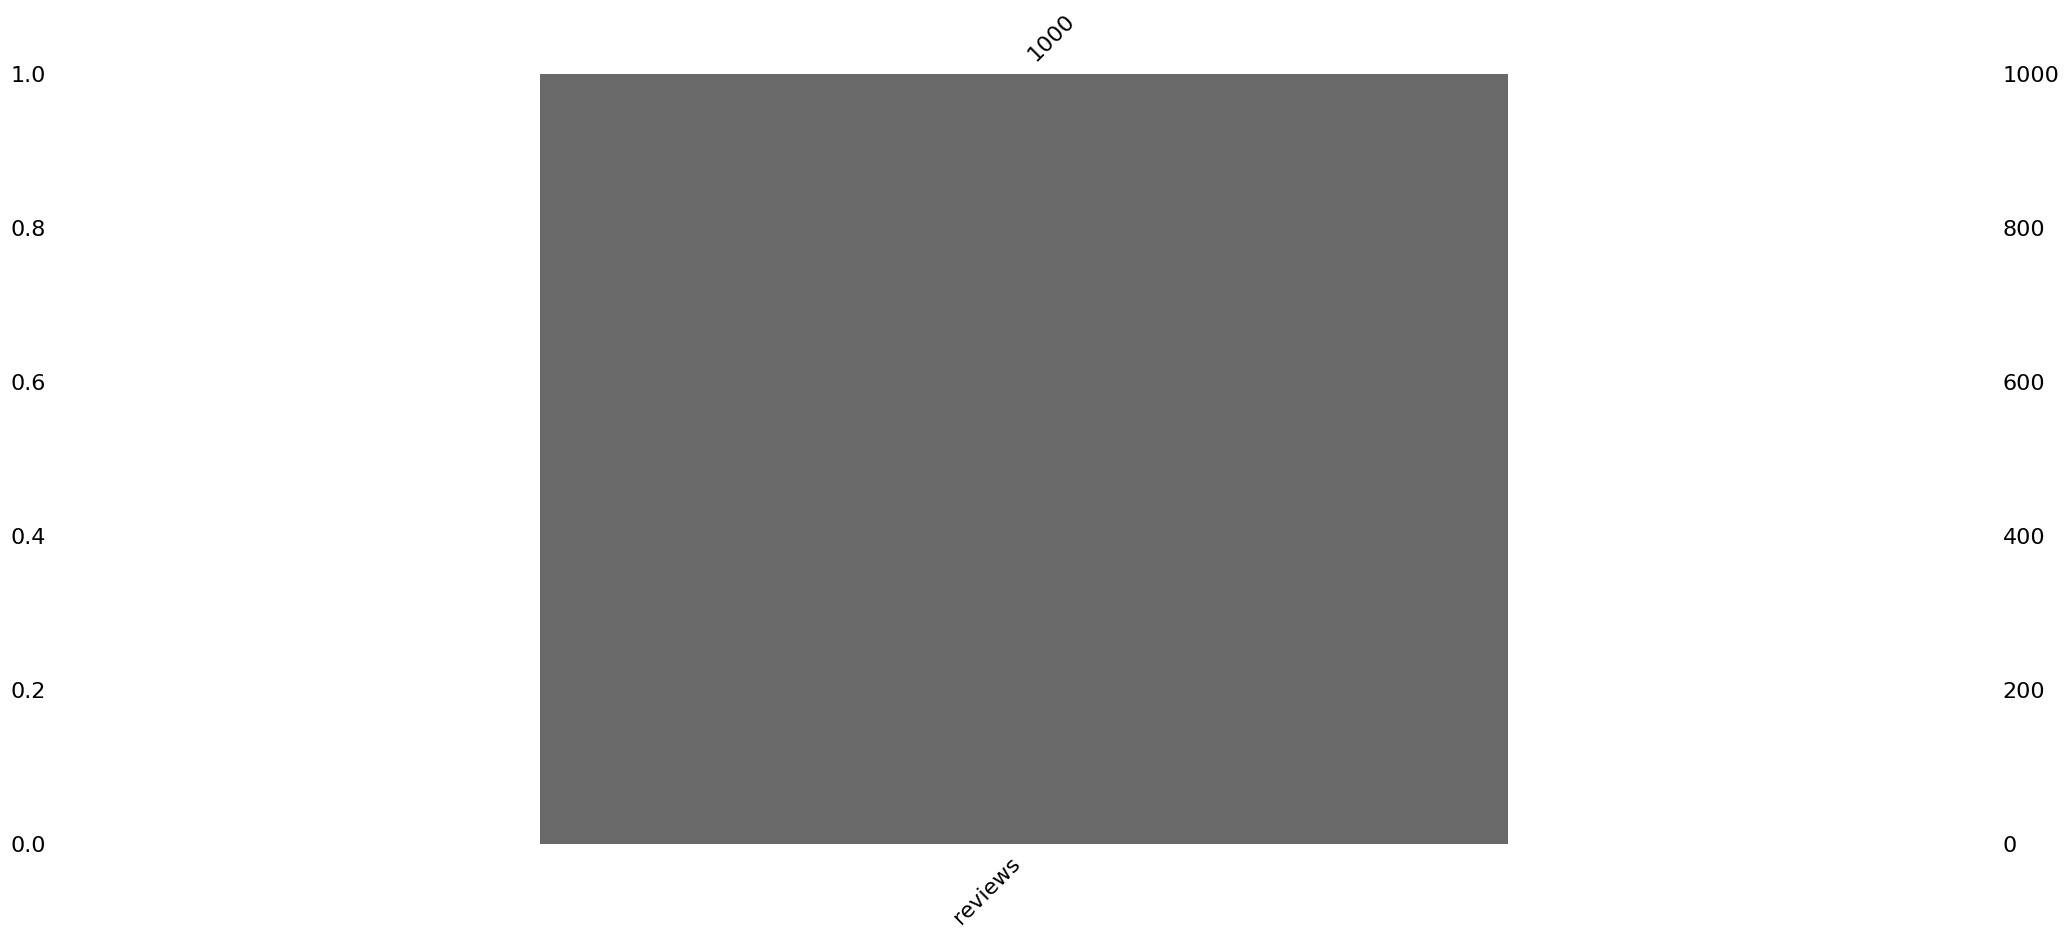

In [33]:
msno.bar(df)

<Axes: >

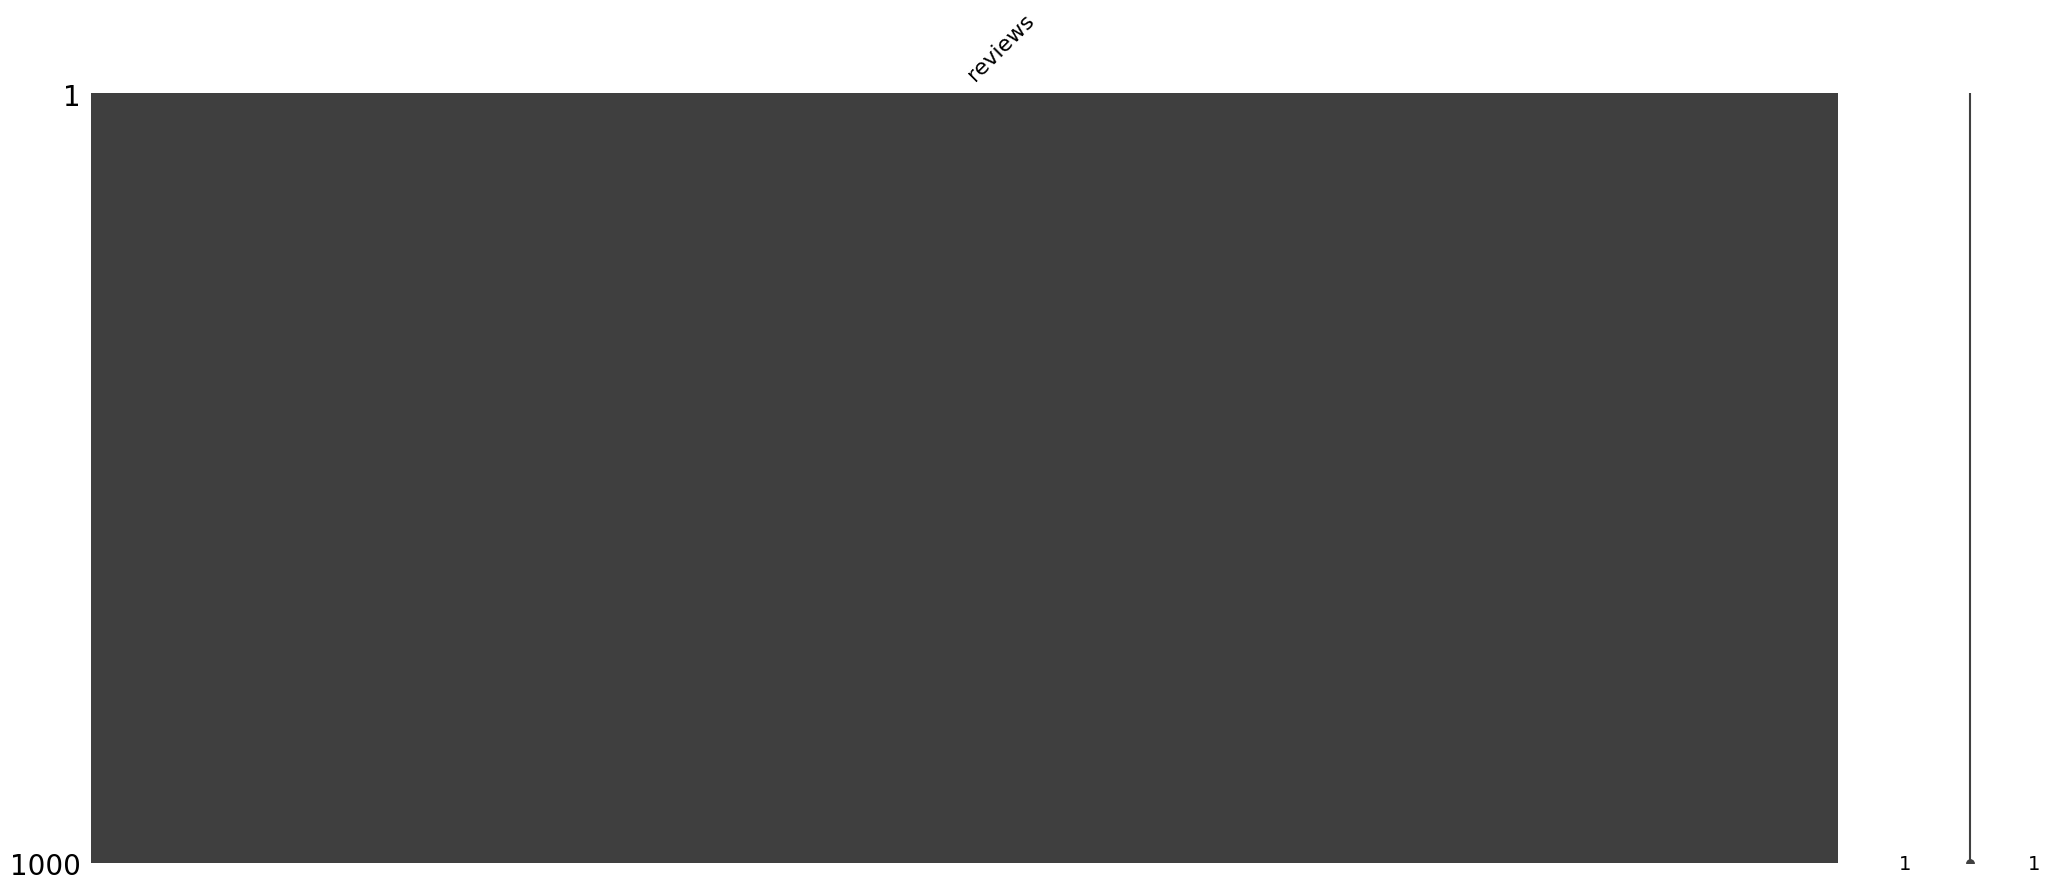

In [34]:
msno.matrix(df)

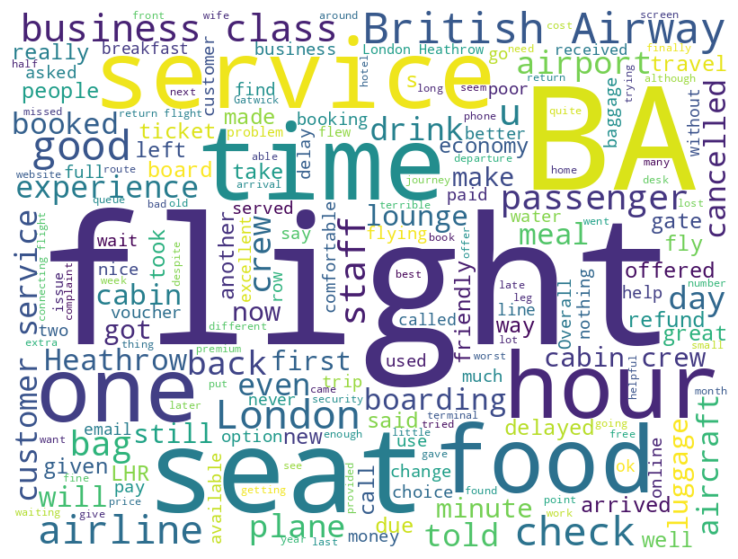

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["reviews"])
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()